# Load PES 2021 Dataset

In this notebook I will go over a quick introduction to linear regression in python using the pandas library. Our examplar will be the players dataset from Konami's "PES 2021" professional soccer game. This dataset is obtained and publicly available through Kaggle. 
https://www.kaggle.com/homerkommrad/efootball-pes2021-all-players-csv 

First, start off by downloading the dataset in a dedicated folder. Then, run the following code boxes which will load the dataset from .csv format into a pandas dataset. The pandas library makes it intuitive to handle small to medium sized datasets (data < 1 GB) while also allowing ease of transition to implement more powerful functions and algorithms. Our data here is only ~5 MB, which is 5/1000 the size of what the pandas library can handle before you need to start using special commands and techniques.




In [48]:
import pandas as pd


players = pd.read_csv('/content/sample_data/pes2021-all-players.csv') #put the directory path of where you saved the dataset

players

,name,shirt_number,team_name,league,nationality,region,height,weight,age,foot,condition,registered_position,LWF,SS,CF,RWF,LMF,DMF,CMF,AMF,RMF,LB,CB,RB,offensive_awareness,ball_control,dribbling,tight_possession,low_pass,lofted_pass,finishing,heading,place_kicking,curl,speed,acceleration,kicking_power,jump,physical_contact,balance,...,skill_rising_shots,skill_marseille_turn,skill_gk_high_punt,skill_heading,skill_dipping_shot,skill_outside_curler,skill_captaincy,skill_gamesmanship,skill_gk_low_punt,skill_low_lofted_pass,skill_through_passing,skill_fighting_spirit,skill_flip_flap,skill_weighted_pass,skill_pinpoint_crossing,skill_sombrero,skill_acrobatic_clear,skill_cut_behind_turn,skill_long_range_drive,skill_scotch_move,skill_acrobatic_finishing,skill_double_touch,skill_gk_long_throw,skill_long_throw,skill_scissors_feint,skill_long_range_shooting,skill_track_back,skill_rabona,skill_knuckle_shot,skill_no_look_pass,skill_super_sub,com_playing_style_trickster,com_playing_style_mazing_run,com_playing_style_speeding_bullet,com_playing_style_incisive_run,com_playing_style_early_cross,com_playing_style_long_ball_expert,com_playing_style_long_ranger,ball_color,rating_stars
0,L. MESSI,10,FC BARCELONA,Spanish League,ARGENTINA,South America,170,72,33,Left foot,C,RWF,1.0,2.0,2.0,2.0,0,0,0,1,1,0,0,0,95,96,97,96,90,91,95,70,94,90,81,90,82,63,70,96,...,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,black,5
1,C. RONALDO,7,JUVENTUS,Serie A TIM,PORTUGAL,Europe,187,83,35,Right foot,C,LWF,2.0,2.0,2.0,2.0,2,0,0,1,2,0,0,0,91,90,89,88,83,82,91,93,83,83,85,87,92,96,87,85,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,black,5
2,R. LEWANDOWSKI,9,FC BAYERN MÜNCHEN,Other European Leagues,POLAND,Europe,185,79,32,Right foot,C,CF,1.0,2.0,2.0,1.0,1,0,0,2,1,0,0,0,94,91,85,82,73,68,92,88,81,75,83,79,89,89,84,82,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,black,5
3,NEYMAR,10,PSG,Ligue 1 Uber Eats,BRAZIL,South America,175,68,28,Right foot,C,LWF,2.0,2.0,1.0,1.0,2,0,1,2,1,0,0,0,86,92,96,95,89,85,87,65,90,92,86,91,81,65,62,90,...,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,black,5
4,K. DE BRUYNE,17,MANCHESTER B,English League,BELGIUM,Europe,181,68,29,Right foot,C,AMF,0.0,1.0,0.0,1.0,0,0,2,2,1,0,0,0,86,92,88,92,96,96,83,63,83,92,79,77,88,64,73,78,...,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,black,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14688,ABDALLAH HAROUN S.,33,AL DUHAIL,AFC Champions League,QATAR,Asia-Oceania,170,68,20,Right foot,C,CMF,0.0,0.0,0.0,0.0,0,1,2,1,0,0,0,0,58,54,59,62,60,57,54,64,57,56,67,66,61,68,63,62,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,white,1
14689,S. SULEIMAN,50,SHABAB AL AHLI DUBAI,AFC Champions League,COMOROS,Africa,177,71,21,Right foot,C,CB,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,46,54,51,50,54,55,43,63,47,52,67,68,59,68,64,62,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,white,1
14690,KHALIFA YOUSUF ATIQ,66,SHABAB AL AHLI DUBAI,AFC Champions League,UNITED ARAB EMIRATES,Asia-Oceania,176,72,18,Right foot,C,CMF,0.0,0.0,0.0,0.0,0,1,2,1,0,0,0,0,54,60,63,57,60,56,52,60,54,62,66,68,62,58,62,64,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,white,1
14691,T. RAKBUN,80,BG PATHUM UNITED,TOYOTA Thai League,THAILAND,Asia-Oceania,166,68,23,Right foot,C,RWF,0.0,1.0,2.0,2.0,0,0,0,0,1,0,0,0,58,55,60,55,54,52,55,52,52,57,68,68,56,60,60,62,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,white,1


Above we have been able to load in our data set and calling the new 'players' object gives us a quick and dirty preview of our dataset. Sometimes calling our dataset object can give us enough information to get a good idea of what we are working with. But, most of the time we will need to have some simple code to confirm what are data are and if there are any things we need to lookout for. Pandas makes this easy, so lets execute the next cells to get to know our dataset. 

In [49]:
#This creates a list of all the columns or features in our dataset 
columns = players.columns.to_list()

print(columns)
print(len(columns)) #Tells you total number of columns/features 

#creating a list of your columns can be really useful for future indexing of more complicated data wrangling and data cleaning  

['name', 'shirt_number', 'team_name', 'league', 'nationality', 'region', 'height', 'weight', 'age', 'foot', 'condition', 'registered_position', 'LWF', 'SS', 'CF', 'RWF', 'LMF', 'DMF', 'CMF', 'AMF', 'RMF', 'LB', 'CB', 'RB', 'offensive_awareness', 'ball_control', 'dribbling', 'tight_possession', 'low_pass', 'lofted_pass', 'finishing', 'heading', 'place_kicking', 'curl', 'speed', 'acceleration', 'kicking_power', 'jump', 'physical_contact', 'balance', 'stamina', 'defensive_awareness', 'ball_winning', 'aggression', 'gk_awareness', 'gk_catching', 'gk_clearing', 'gk_reflexes', 'gk_reach', 'weak_foot_usage', 'weak_foot_accuracy', 'form', 'injury_resistance', 'overall_rating', 'rating_as_GK', 'rating_as_CB', 'rating_as_LB', 'rating_as_RB', 'rating_as_DMF', 'rating_as_CMF', 'rating_as_LMF', 'rating_as_RMF', 'rating_as_AMF', 'rating_as_LWF', 'rating_as_RWF', 'rating_as_SS', 'rating_as_CF', 'playing_style', 'skill_cross_over_turn', 'skill_early_cross', 'skill_first_time_shot', 'skill_incisive_run'

In [50]:
#You can also get a simple overall summary of your data
players.info()

#Notably we can see that there is data of 14693 players and that as a pandas object it takes up ~13.5 MB of memory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14693 entries, 0 to 14692
Columns: 120 entries, name to rating_stars
dtypes: float64(4), int64(105), object(11)
memory usage: 13.5+ MB


In [51]:
#The nunique() method gives us how many unique counts of data are in each column, since we have more columns than our preview allows it shows '...'
players.nunique()

name                                  13783
shirt_number                           1337
team_name                               466
league                                   27
nationality                             157
                                      ...  
com_playing_style_early_cross             2
com_playing_style_long_ball_expert        2
com_playing_style_long_ranger             2
ball_color                                5
rating_stars                              5
Length: 120, dtype: int64

In [52]:
#To fix the preview cutoff, we can leverage our columns list as an indexer to for example only look at the first 10 
players[columns[0:10]].nunique()

name            13783
shirt_number     1337
team_name         466
league             27
nationality       157
region              5
height             47
weight             54
age                29
foot                2
dtype: int64

In [53]:
#Another important thing to check out is if any columns contain empty data cells, here's one way to check 
na_cols = players.columns[players.isna().any()].tolist()
na_cols

#Only 4 out of 120 columns contain NA values, we can further explore this but this will be saved for data cleaning specific tutorial
#Here our data is mostly clean so we will move on 

['LWF', 'SS', 'CF', 'RWF']

In [54]:
#Same thing with null values
players.columns[players.isnull().any()]

Index(['LWF', 'SS', 'CF', 'RWF'], dtype='object')

We now have a general sense of what is going in our data. Our data here is close to squeeky clean, which is not the case when finding data in the wild and especially when scraping info from the web. Here we will not focus on data wrangling/ cleaning. Instead we will focus on using similar pandas funcitonality for exploration and curation. Primary functions in exploration/curation of data include aggregation, selection, sorting, and grouping. This will be used to focus in on a problem that we can do some linear regression on. 

Our dataset has a lot of features to include in a model and furthermore it includes many types of subcategories inside these features. We will need to explore and then curate parts of the data to have sensible sections to work with. 

In [55]:
# First, lets get a simple statistical summary of players 

players[['height','weight','age','overall_rating']].describe()

#gives us a quick summary of our selected continous data columns 

,height,weight,age,overall_rating
count,14693.000000,14693.000000,14693.000000,14693.000000
mean,180.816647,74.439189,25.660859,68.214932
std,6.784317,6.848696,4.849386,6.415460
min,156.000000,40.000000,15.000000,50.000000
25%,176.000000,70.000000,22.000000,64.000000
50%,180.000000,74.000000,25.000000,68.000000
75%,186.000000,79.000000,29.000000,72.000000
max,203.000000,113.000000,43.000000,94.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ca4bfcf98>,
      dtype=object)

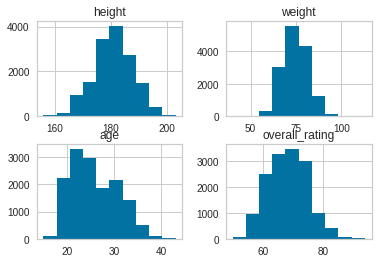

In [56]:
#lets visualize this 
sel_cols = ['height','weight','age','overall_rating']

players[sel_cols].hist()

We now have a general idea of what types of physical dimensionalities our players have and how the player rating distribution is spread.

In [57]:
#Now lets do some conditional data selection to peek into the top rated players 
players[['name','nationality','age','overall_rating']][players['overall_rating'] >= 88]

#These are names that a soccer fan would recognize 

,name,nationality,age,overall_rating
0,L. MESSI,ARGENTINA,33,94
1,C. RONALDO,PORTUGAL,35,93
2,R. LEWANDOWSKI,POLAND,32,92
3,NEYMAR,BRAZIL,28,92
4,K. DE BRUYNE,BELGIUM,29,92
5,J. OBLAK,SLOVENIA,27,91
6,V. VAN DIJK,NETHERLANDS,29,91
7,K. MBAPPÉ,FRANCE,22,91
8,SERGIO RAMOS,SPAIN,34,90
9,S. AGÜERO,ARGENTINA,32,90


# Predicting the Best Forwards

We have looked at our data in various different ways and there are still many more ways to explore and get to know your data, so we will simply move one and get to a linear regression example. As we saw, our data gives us a lot of different features and players to work with so lets work with a popular and simple question in soccer.

Can we use our data to train a model that predicts the best forwards?

Soccer datasets are usually historical performance stats based or skill based. It is often more common to see the skill based datasets from video games, which take into account historical performance along with their own secret sauce. A skill based dataset makes it easier to ask the same question for different types of players, but it does leave us in the dark about some arbitration when it comes to skill levels. Here we will use the primary player skills to try to predict overall rating of Forwards. 

First, lets select and organize our data to reflect our question. 

In [58]:
#Some players can play more than one position so position columns have values delineating how capable they are in that position 
#We know that a player with a 0.0 score can be treated as irrelevant for that position
Forwards = players[players['CF'] > 0.0]
Forwards = Forwards.reset_index()
Forwards
#Now we have a pandas dataframe with only players that are relvant for the Forward position 

,index,name,shirt_number,team_name,league,nationality,region,height,weight,age,foot,condition,registered_position,LWF,SS,CF,RWF,LMF,DMF,CMF,AMF,RMF,LB,CB,RB,offensive_awareness,ball_control,dribbling,tight_possession,low_pass,lofted_pass,finishing,heading,place_kicking,curl,speed,acceleration,kicking_power,jump,physical_contact,...,skill_rising_shots,skill_marseille_turn,skill_gk_high_punt,skill_heading,skill_dipping_shot,skill_outside_curler,skill_captaincy,skill_gamesmanship,skill_gk_low_punt,skill_low_lofted_pass,skill_through_passing,skill_fighting_spirit,skill_flip_flap,skill_weighted_pass,skill_pinpoint_crossing,skill_sombrero,skill_acrobatic_clear,skill_cut_behind_turn,skill_long_range_drive,skill_scotch_move,skill_acrobatic_finishing,skill_double_touch,skill_gk_long_throw,skill_long_throw,skill_scissors_feint,skill_long_range_shooting,skill_track_back,skill_rabona,skill_knuckle_shot,skill_no_look_pass,skill_super_sub,com_playing_style_trickster,com_playing_style_mazing_run,com_playing_style_speeding_bullet,com_playing_style_incisive_run,com_playing_style_early_cross,com_playing_style_long_ball_expert,com_playing_style_long_ranger,ball_color,rating_stars
0,0,L. MESSI,10,FC BARCELONA,Spanish League,ARGENTINA,South America,170,72,33,Left foot,C,RWF,1.0,2.0,2.0,2.0,0,0,0,1,1,0,0,0,95,96,97,96,90,91,95,70,94,90,81,90,82,63,70,...,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,black,5
1,1,C. RONALDO,7,JUVENTUS,Serie A TIM,PORTUGAL,Europe,187,83,35,Right foot,C,LWF,2.0,2.0,2.0,2.0,2,0,0,1,2,0,0,0,91,90,89,88,83,82,91,93,83,83,85,87,92,96,87,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,black,5
2,2,R. LEWANDOWSKI,9,FC BAYERN MÜNCHEN,Other European Leagues,POLAND,Europe,185,79,32,Right foot,C,CF,1.0,2.0,2.0,1.0,1,0,0,2,1,0,0,0,94,91,85,82,73,68,92,88,81,75,83,79,89,89,84,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,black,5
3,3,NEYMAR,10,PSG,Ligue 1 Uber Eats,BRAZIL,South America,175,68,28,Right foot,C,LWF,2.0,2.0,1.0,1.0,2,0,1,2,1,0,0,0,86,92,96,95,89,85,87,65,90,92,86,91,81,65,62,...,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,black,5
4,7,K. MBAPPÉ,7,PSG,Ligue 1 Uber Eats,FRANCE,Europe,178,73,22,Right foot,C,CF,2.0,1.0,2.0,2.0,2,0,1,1,2,0,0,0,88,89,94,89,78,73,87,77,74,79,96,97,80,86,78,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,0,black,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,14655,P. SOIMALAI,33,BURIRAM UNITED,TOYOTA Thai League,THAILAND,Asia-Oceania,170,68,19,Right foot,C,CF,0.0,1.0,2.0,0.0,0,0,0,0,0,0,0,0,63,57,60,60,54,52,64,60,60,61,66,67,60,62,61,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,white,1
3780,14659,P. JITSANOH,41,SAMUT PRAKAN CITY,TOYOTA Thai League,THAILAND,Asia-Oceania,170,68,18,Right foot,C,CF,0.0,1.0,2.0,0.0,0,0,0,0,0,0,0,0,63,54,59,56,56,50,62,58,55,53,72,71,64,64,62,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,white,1
3781,14660,W. JAREONTAVEESUK,43,POLICE TERO,TOYOTA Thai League,THAILAND,Asia-Oceania,170,68,22,Right foot,C,CF,0.0,1.0,2.0,0.0,0,0,0,0,0,0,0,0,63,57,57,54,54,55,65,65,52,55,65,65,62,66,61,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,white,1
3782,14683,F. GANCITANO,28,TRAPANI,Serie BKT,ITALY,Europe,180,78,19,Right foot,C,CF,0.0,1.0,2.0,0.0,0,0,0,0,0,0,0,0,62,58,59,57,61,56,61,61,55,59,63,68,62,68,63,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,white,1


In [59]:
#Lets pick some relevant performance predictors 

#relevant performance predictors
Fskills = columns[24:44] #The columns list with created somes in handy here
Fskills

#There's other skills we can add as well as special skills, but this is a good start

['offensive_awareness',
 'ball_control',
 'dribbling',
 'tight_possession',
 'low_pass',
 'lofted_pass',
 'finishing',
 'heading',
 'place_kicking',
 'curl',
 'speed',
 'acceleration',
 'kicking_power',
 'jump',
 'physical_contact',
 'balance',
 'stamina',
 'defensive_awareness',
 'ball_winning',
 'aggression']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ca1b0ff28>,
      dtype=object)

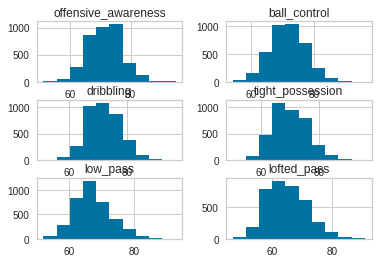

In [60]:
#Lets look at the distributions 
Forwards[Fskills[0:6]].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ca1bae3c8>,
      dtype=object)

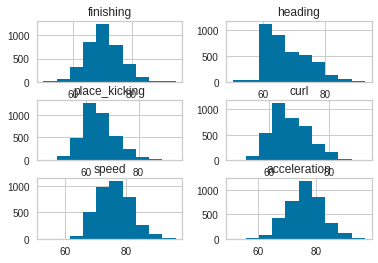

In [61]:
Forwards[Fskills[6:12]].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ca14b65f8>,
      dtype=object)

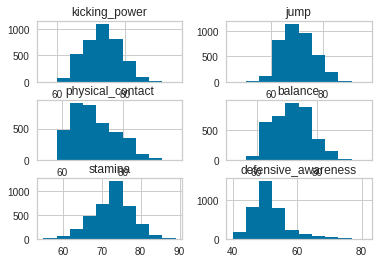

In [62]:
Forwards[Fskills[12:18]].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ca12d0a58>,
      dtype=object)

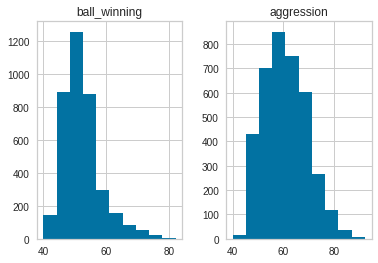

In [63]:
Forwards[Fskills[18:20]].hist()

The above figures give us a good idea of how the features we selected as predictors are distributed across players look like. Most of them seem normally distributed with some minor variations of some features being more heavy tailed or uniform. This is good because in linear regression modeling, the theoretical assumption is that we are sampling from a normally distributed population. 

# Linear Regression 

We have now spent most of our time getting to know our data enough to formulate a testable hypothesis. Namely, whether our selected features can predict the ovarall rating of our Forwards. In linear regression the data from our predictors will be trained to see to what extent values from those features can tell us what the overall rating of that player should be. 

In [64]:
#Set up our predictors and targets as train and test set
from sklearn.model_selection import train_test_split
X = Forwards[Fskills]
y = Forwards['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [65]:
#Set up our linear model 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model1 = lr.fit(X_train, y_train)
y_pred = model1.predict(X_test)
residuals = (y_test - y_pred)

In [67]:
#This is our R2 score from our test data, i.e., how well the model was able to fit our training data and then able to generalize to our test set
model1.score(X_test, y_test)

0.9731992648839096

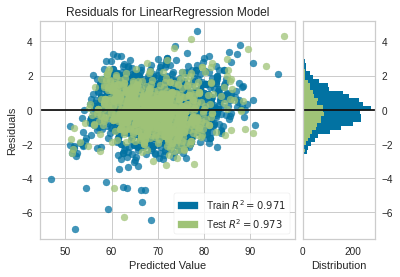

In [68]:
#Lets use yellowbrick to visually understand how well our model is fitting and testing in our dataset 
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


visualizer = ResidualsPlot(lr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

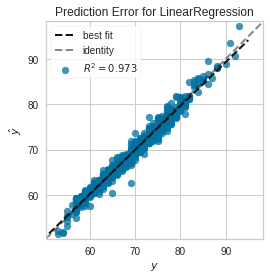

In [69]:
#We can also more directly compare our model prediction fit to an idealized fit
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)
visualizer.poof()

The regression model had a very strong fit. This is most likely due to the large amount of predictors. More predictors means a more complex model and this could fail when trying to deal with new data outside of this dataset. 

Lets try to create a model with less predictors and a good fit.

In [70]:
#Lets try to use only the first half of the features from the previous models

Fskills = columns[24:34] #The columns list with created somes in handy here
Fskills

['offensive_awareness',
 'ball_control',
 'dribbling',
 'tight_possession',
 'low_pass',
 'lofted_pass',
 'finishing',
 'heading',
 'place_kicking',
 'curl']

In [71]:
X = Forwards[Fskills]
y = Forwards['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

scaler = StandardScaler() 

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [72]:
lr = LinearRegression()

model1 = lr.fit(X_train, y_train)
y_pred = model1.predict(X_test)
residuals = (y_test - y_pred)

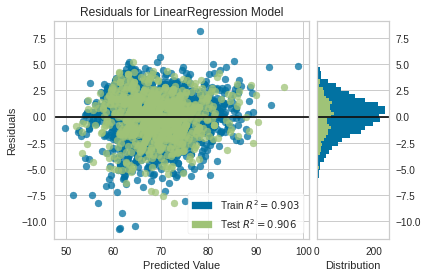

In [73]:
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

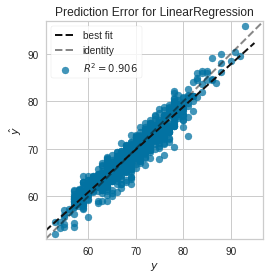

In [74]:
visualizer = PredictionError(lr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)
visualizer.poof()

Cutting the number of predictors by half still gives a strong model fit. Lets try a model with just 3 predictors now. 

In [75]:
Fskills = columns[24:27] #The columns list with created somes in handy here

X = Forwards[Fskills]
y = Forwards['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

scaler = StandardScaler() 

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

lr = LinearRegression()

model1 = lr.fit(X_train, y_train)
y_pred = model1.predict(X_test)
residuals = (y_test - y_pred)

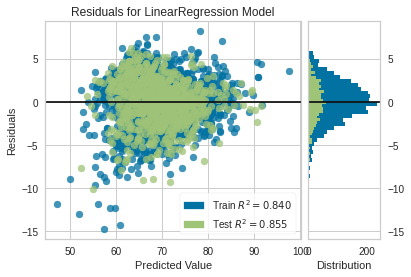

In [76]:
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

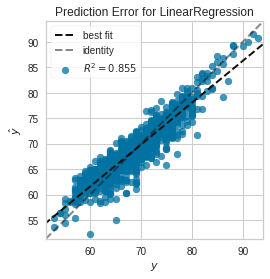

In [77]:
visualizer = PredictionError(lr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)
visualizer.poof()

Using only 3 predictors gives a more realistic model fit and it is still very decent. Next, lets see if we can use some simple optimization techniques to try to boost our model fit. 

In linear regression we can add regularization of type L1 (lasso) or L2 (ridge). L1 does a good job at dampening any noise in the data while L2 tries to highlight meaningful data over noise. Lets do ane xample of this with L2. We will need to use the elbow method to pick the optimal penalty term in our regularization. 

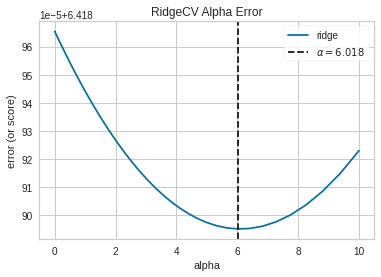

In [39]:
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import RidgeCV
import numpy as np

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model2 = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model2)
visualizer.fit(X_train, y_train)
visualizer.poof()

In [40]:

from sklearn.linear_model import Ridge

model2 = Ridge(alpha=6.018)
model2 = model2.fit(X_train, y_train)

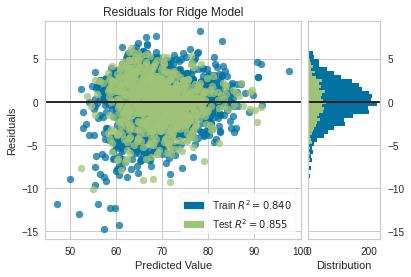

In [41]:
visualizer = ResidualsPlot(model2)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)
visualizer.poof()

We can see that the L2 regularization didn't have an effect even if our alpha selection method gave us a good elbow to test as a penalty term. This is most likely accredited due to the data not being noisy, as we've seen in the histograms of our features. 
In conclusion, linear regression models don't need to be overly complex in ourder to provide good fits. We also don't need always try to optimize our models unless we have a suspicion that the data may be complicated by looking at our data distributions. This dataset provided skill based features which are curated aggregates of players historical performance along with some in house specific definitions of how good a certain player is. We won't always have access to clean and curated data such as this and that's when we can start worrying about residual variance, regularization methods, and alpha selection. This will be covered in a future tutorial, so say tuned.  